# EasyVisa Project

## Context:

Business communities in the United States are facing high demand for human resources, but one of the constant challenges is identifying and attracting the right talent, which is perhaps the most important element in remaining competitive. Companies in the United States look for hard-working, talented, and qualified individuals both locally as well as abroad.

The Immigration and Nationality Act (INA) of the US permits foreign workers to come to the United States to work on either a temporary or permanent basis. The act also protects US workers against adverse impacts on their wages or working conditions by ensuring US employers' compliance with statutory requirements when they hire foreign workers to fill workforce shortages. The immigration programs are administered by the Office of Foreign Labor Certification (OFLC).

OFLC processes job certification applications for employers seeking to bring foreign workers into the United States and grants certifications in those cases where employers can demonstrate that there are not sufficient US workers available to perform the work at wages that meet or exceed the wage paid for the occupation in the area of intended employment.

## Objective:

In FY 2016, the OFLC processed 775,979 employer applications for 1,699,957 positions for temporary and permanent labor certifications. This was a nine percent increase in the overall number of processed applications from the previous year. The process of reviewing every case is becoming a tedious task as the number of applicants is increasing every year.

The increasing number of applicants every year calls for a Machine Learning based solution that can help in shortlisting the candidates having higher chances of VISA approval. OFLC has hired your firm EasyVisa for data-driven solutions. You as a data scientist have to analyze the data provided and, with the help of a classification model:

* Facilitate the process of visa approvals.
* Recommend a suitable profile for the applicants for whom the visa should be certified or denied based on the drivers that significantly influence the case status. 


## Data Description

The data contains the different attributes of the employee and the employer. The detailed data dictionary is given below.

* case_id: ID of each visa application
* continent: Information of continent the employee
* education_of_employee: Information of education of the employee
* has_job_experience: Does the employee has any job experience? Y= Yes; N = No
* requires_job_training: Does the employee require any job training? Y = Yes; N = No 
* no_of_employees: Number of employees in the employer's company
* yr_of_estab: Year in which the employer's company was established
* region_of_employment: Information of foreign worker's intended region of employment in the US.
* prevailing_wage:  Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment. 
* unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
* full_time_position: Is the position of work full-time? Y = Full Time Position; N = Part Time Position
* case_status:  Flag indicating if the Visa was certified or denied

# Overview of data

## Importing necessary libraries and data

In [1]:
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 100)


# Libraries different ensemble classifiers
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
    StackingClassifier,
)

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

# Libraries to get different metric scores
from sklearn import metrics
from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
)

# To tune different models
from sklearn.model_selection import GridSearchCV

## Data Overview


In [2]:
#Loading dataset
data=pd.read_csv("EasyVisa.csv")


In [3]:
# copying data to another variable to avoid any changes to original data**
data = data.copy()

### View the first and last 5 rows of the dataset

In [4]:
# copying data to another variable to avoid any changes to original data**
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [5]:
# copying data to another variable to avoid any changes to original data**
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


### Understand the shape of the dataset

In [6]:
# copying data to another variable to avoid any changes to original data**
data.shape

(25480, 12)

### Check the data types of the columns for the dataset

In [7]:
#Check data type and not null values for each column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


- We can see that there are total of 12 columns and 25480 rows in the dataset.
- All columns' data type is integer(2) or float(1). column - 'case_id','continent','education_of_employee','has_job_experience','requires_job_training','region_of_employment','unit_of_wage','full_time_position','case_status' which is of the object type.All other attributes are of object type need to be converted to the right datatype
- The number of non-null values of each column is equal to the number of total rows in the dataset i.e. no null value. We can further confirm this using `isna()` method.

In [8]:
# checking for duplicate values
data[data.duplicated()].count()

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- There are no repeat data entries in the dataset that will need further cleaning

In [9]:
data.isna().sum()
#Check missing values in the data set

case_id                  0
continent                0
education_of_employee    0
has_job_experience       0
requires_job_training    0
no_of_employees          0
yr_of_estab              0
region_of_employment     0
prevailing_wage          0
unit_of_wage             0
full_time_position       0
case_status              0
dtype: int64

- There are no missing values in the data.

In [10]:
cols = data.select_dtypes(['object'])
cols.columns

Index(['case_id', 'continent', 'education_of_employee', 'has_job_experience',
       'requires_job_training', 'region_of_employment', 'unit_of_wage',
       'full_time_position', 'case_status'],
      dtype='object')

In [11]:
for i in cols.columns:
    data[i] = data[i].astype('category')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   case_id                25480 non-null  category
 1   continent              25480 non-null  category
 2   education_of_employee  25480 non-null  category
 3   has_job_experience     25480 non-null  category
 4   requires_job_training  25480 non-null  category
 5   no_of_employees        25480 non-null  int64   
 6   yr_of_estab            25480 non-null  int64   
 7   region_of_employment   25480 non-null  category
 8   prevailing_wage        25480 non-null  float64 
 9   unit_of_wage           25480 non-null  category
 10  full_time_position     25480 non-null  category
 11  case_status            25480 non-null  category
dtypes: category(9), float64(1), int64(2)
memory usage: 2.0 MB


## Summary of the dataset

In [13]:
# Summary of continuous columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


- The mean and median value of no_of_employees is approx 5667 and 2109.This shows the possiblity of outliers.
- Companies in the dataset with years of establishment is from 1800 to 2016.
- The mean and median value for 'prevailing_wage' is approx 74455 and 70308 respectively.So data is slight right skewed. This indicates, slight right skewness in the data set. 

In [14]:
data.describe(include=['category']).T

,count,unique,top,freq
case_id,25480,25480,EZYV01,1
continent,25480,6,Asia,16861
education_of_employee,25480,4,Bachelor's,10234
has_job_experience,25480,2,Y,14802
requires_job_training,25480,2,N,22525
region_of_employment,25480,5,Northeast,7195
unit_of_wage,25480,4,Year,22962
full_time_position,25480,2,Y,22773
case_status,25480,2,Certified,17018


- case_id attribute can be dropped since it is a unique ID.
- There are 6 continents.
- Top applicants are from Asia.
- There are 4 different levels of eduction.
- Most employees have  Bachelors as  highest education.
- Majority applicants have job experience.
- 5 different regions in the US requiring immigrants due to Human Resource shortages.
- Maximumemployment is being in the NorthEast.
- There are 4 different units of wages

## Number of unique values in each column

In [15]:
data.nunique()

case_id                  25480
continent                    6
education_of_employee        4
has_job_experience           2
requires_job_training        2
no_of_employees           7105
yr_of_estab                199
region_of_employment         5
prevailing_wage          25454
unit_of_wage                 4
full_time_position           2
case_status                  2
dtype: int64

- We can drop 'case_id' column as it is an ID variable and will not add value to the model.

In [16]:
data.drop(['case_id'],axis=1,inplace=True)

In [17]:
data.shape

(25480, 11)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

## Univariate analysis

In [18]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Observations on number of employees

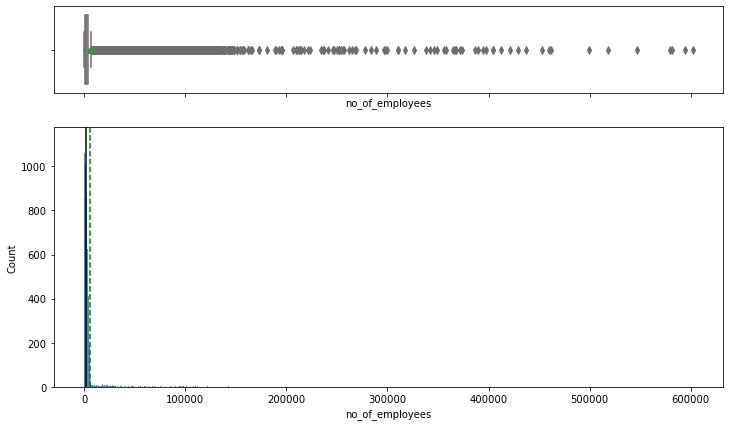

In [19]:
#Observations on no_of_employees
histogram_boxplot(data, "no_of_employees")

- Number of employees for employers is skewed right

### Observations on year_of_establishment

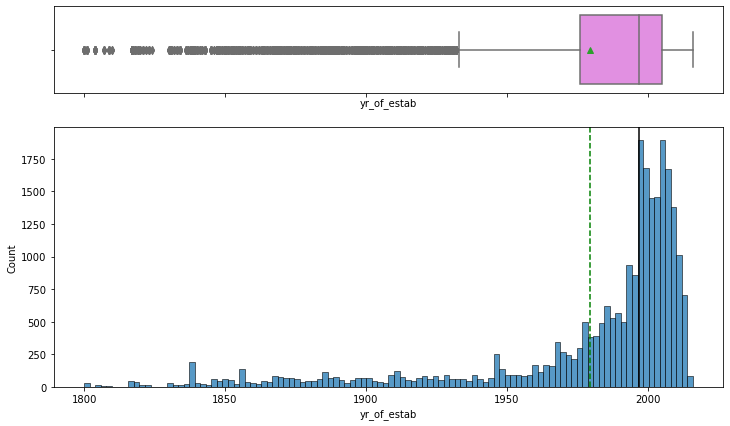

In [20]:
#Observations on year_of_establishment
histogram_boxplot(data, "yr_of_estab")

- Distribution for year established is skewed left

### Observations on prevailing_wage

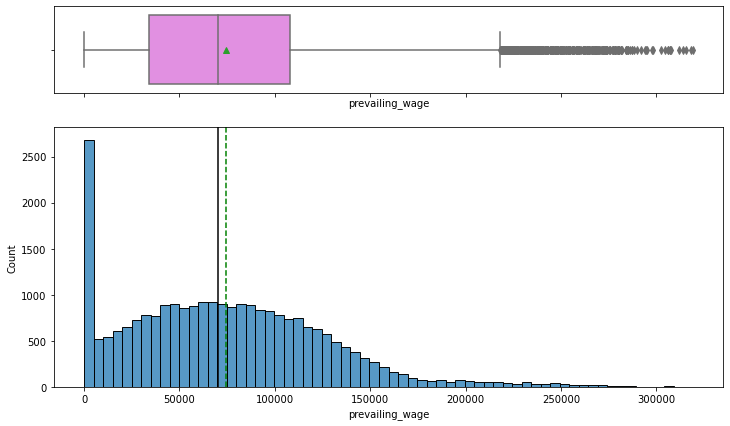

In [21]:
#Observations on prevailing_wage
histogram_boxplot(data, "prevailing_wage")

- There is outliers

In [22]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

### Observations on  unit_of_wage

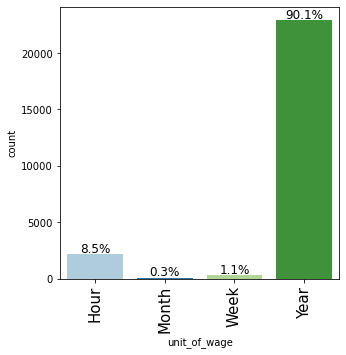

In [23]:
labeled_barplot(data, "unit_of_wage", perc=True);

-  90% of all entries are with unit_of_wage as yearly 
- 8.5% entries as hourly

### Observations on  unit_of_wage

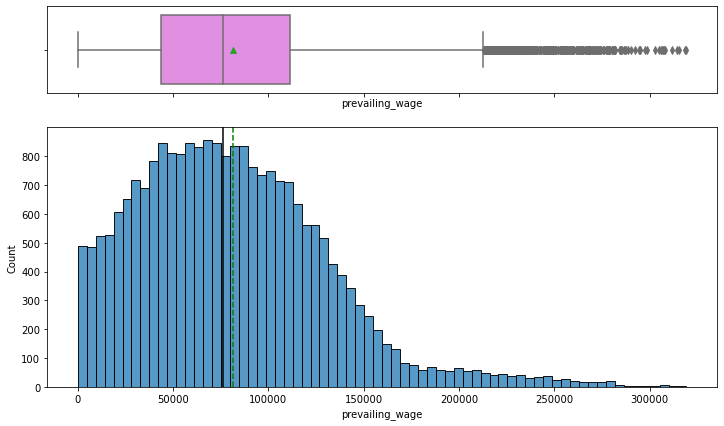

In [24]:
#Observations specifically on data where unit_of_wage is yearly
histogram_boxplot(data[(data["unit_of_wage"]=="Year")], "prevailing_wage")

- Median and mean annual salary is approx. USD 70,000


In [25]:
# Summary of continuous columns
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


- Average and median annual salary is approx. USD 70,000 
-There is outliers from 20,0000 to 300000.


### Observations on  data where unit_of_wage is weekly or monthly

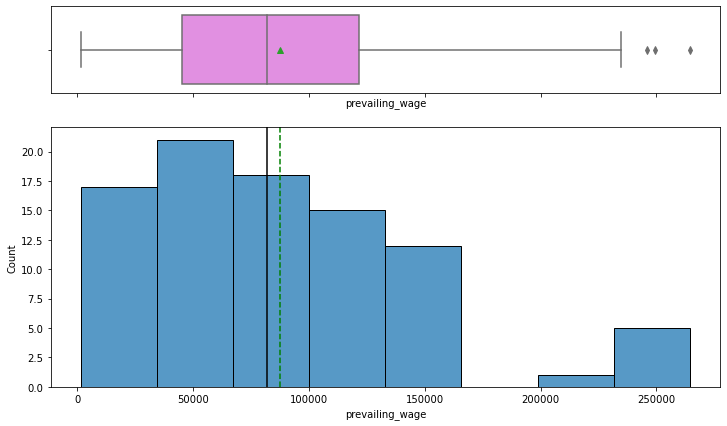

In [26]:
#Observations specifically on data where unit_of_wage is weekly or monthly
histogram_boxplot(data[(data["unit_of_wage"]=="Month")], "prevailing_wage")

### Observations on  data where unit_of_wage is weekly or week

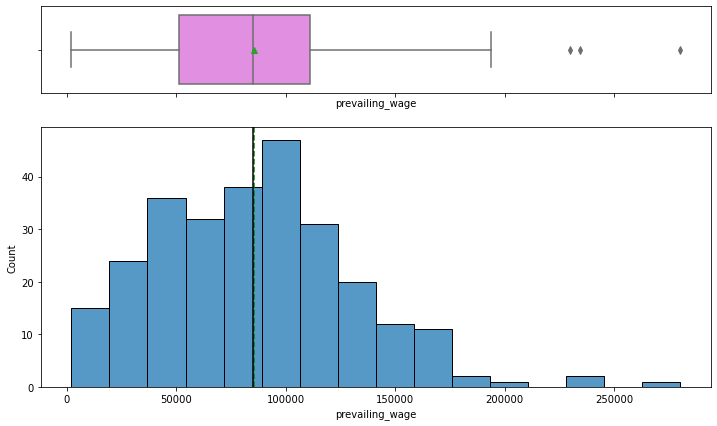

In [27]:
histogram_boxplot(data[(data["unit_of_wage"]=="Week")], "prevailing_wage")

### Observations on  data where unit_of_wage is hourly

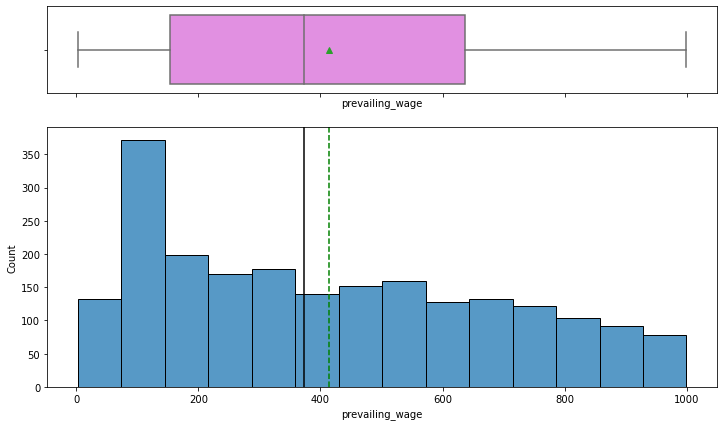

In [28]:
#Observations specifically on data where unit_of_wage is hourly 
histogram_boxplot(data[data["unit_of_wage"]=="Hour"], "prevailing_wage")

-  prevailing_wage is likely a weekly salary where unit_of_wage is hourly

In [29]:
data.loc[data["unit_of_wage"]=="Hour", "prevailing_wage"] = \
data.loc[data["unit_of_wage"]=="Hour", "prevailing_wage"]*52
# assuming 52 paid weeks per year

In [30]:
data["unit_of_wage"] = data["unit_of_wage"].astype('object')
data.loc[data["unit_of_wage"]=="Hour", "unit_of_wage"] = "Hourly"
data.loc[data["unit_of_wage"]=="Week", "unit_of_wage"] = "Not_Hourly"
data.loc[data["unit_of_wage"]=="Month", "unit_of_wage"] = "Not_Hourly"
data.loc[data["unit_of_wage"]=="Year", "unit_of_wage"] = "Not_Hourly"
data["unit_of_wage"] = data["unit_of_wage"].astype('category')

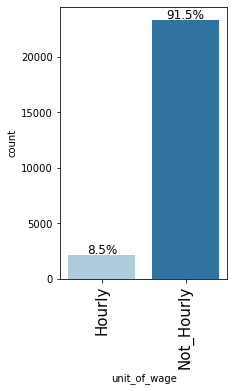

In [31]:
labeled_barplot(data, "unit_of_wage", perc=True)

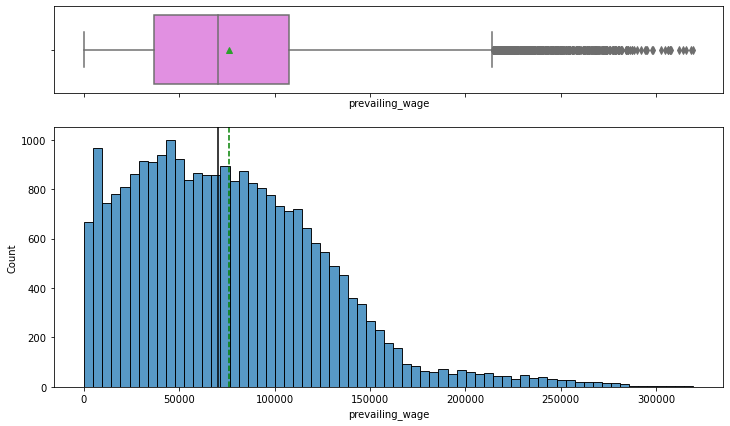

In [32]:
histogram_boxplot(data, "prevailing_wage")

- There is outliers

### Observations on continent

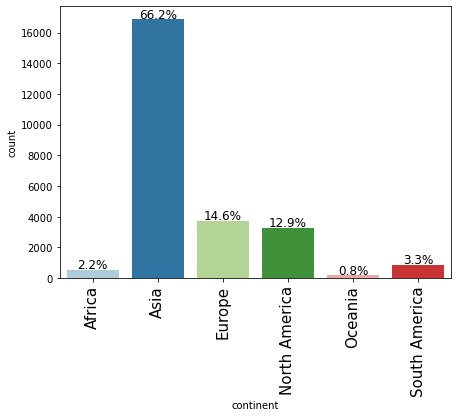

In [33]:
#Observations on continent
labeled_barplot(data, "continent", perc=True)

- 66.2% of employees are from Asia

### Observations on education of employee

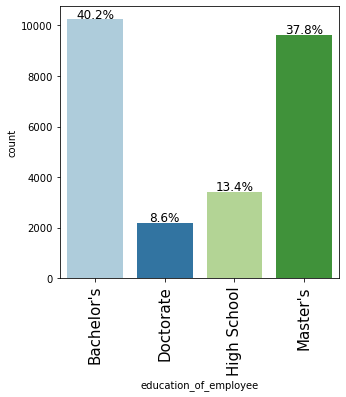

In [34]:
#Observations on education
labeled_barplot(data, "education_of_employee", perc=True)

- 40% of employees have either a bachelor's 
- 38% has master's (38%) 
- 8% of applicants have a doctorate
- 13% HAS high school diploma

### Observations on job_experience

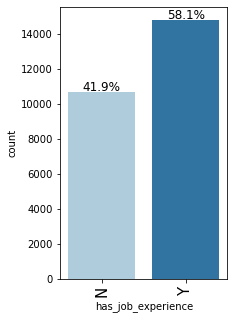

In [35]:
#Observations on job_experience
labeled_barplot(data, "has_job_experience", perc=True)

-  58% employees have job experience
- 42% employees do not

### Observations on job training

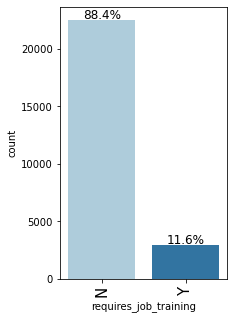

In [36]:
#Observations on requires_training
labeled_barplot(data, "requires_job_training", perc=True)

- 88% do not require job training 
-  58% had prior job experience

### Observations on region of employment 

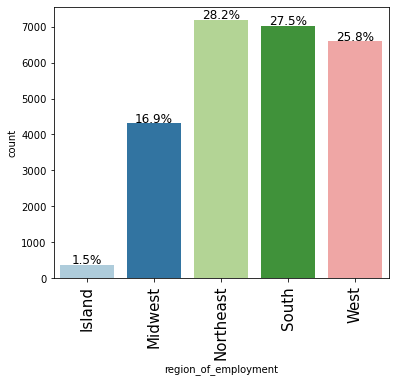

In [37]:
#Observations on region_of_employment 
labeled_barplot(data, "region_of_employment", perc=True)

- Northeast, South and West have around employment opportunities

### Observations on full time position

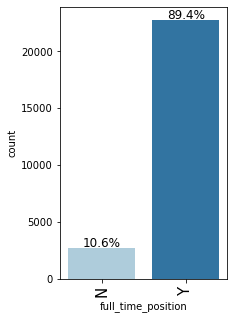

In [38]:
#Observations on full_time_position
labeled_barplot(data, "full_time_position", perc=True)

- 88% are full time positions

### Observations on case status

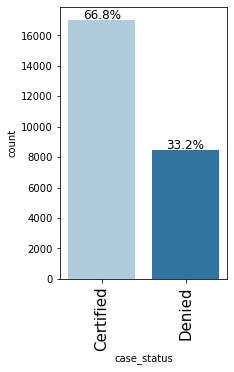

In [39]:
#Observations on case_status
labeled_barplot(data, "case_status", perc=True)

- 67% cases are approved and 33% cases are denied

## Bivariate analysis

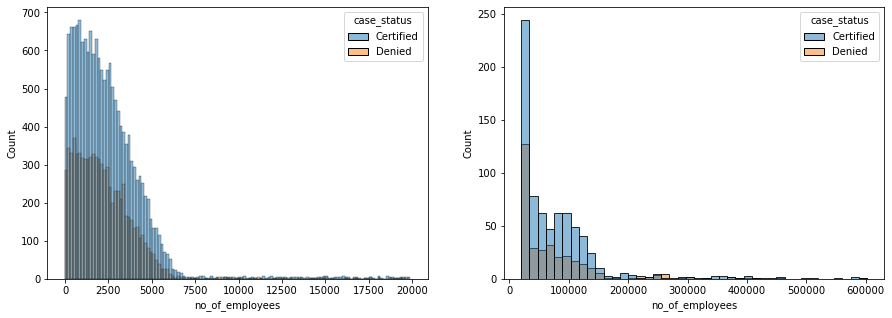

In [40]:
#number of employees and case status
fig,ax=plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=data[data["no_of_employees"]<20000], x="no_of_employees", hue="case_status", ax=ax[0]);
sns.histplot(data=data[data["no_of_employees"]>20000], x="no_of_employees", hue="case_status", ax=ax[1]);

- Lot of outliers , hence further treatment will be needed.

In [41]:
data["no_of_employees"] = pd.cut( data["no_of_employees"], \
                                  [0, 2500, 7500, np.inf], \
                                  labels = ["Small_Sized(<2500employees)", \
                                            "Medium_Sized(2500-7500employees)", \
                                            "Large_Sized(>75000employees)"])
data["no_of_employees"] = data["no_of_employees"].astype("category")

In [42]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()



case_status                       Certified  Denied    All
no_of_employees                                           
All                                   17001    8446  25447
Small_Sized(<2500employees)            9674    5084  14758
Medium_Sized(2500-7500employees)       6272    2874   9146
Large_Sized(>75000employees)           1055     488   1543
------------------------------------------------------------------------------------------------------------------------


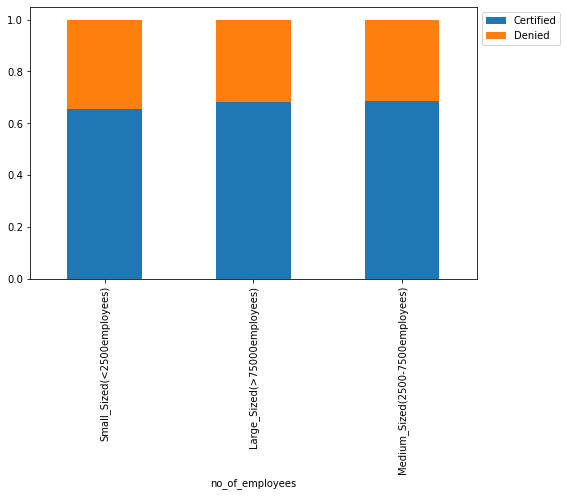

In [43]:
stacked_barplot(data, "no_of_employees", "case_status")

- 65% of cases in all categories are certified
- 58% are small sized companies 
- 36% are medium_sized 
- 6% are larege sized companies 

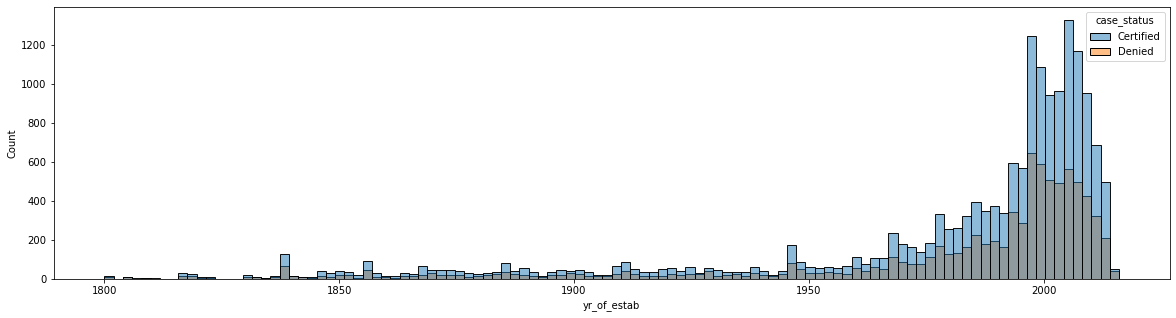

In [44]:
#year of establishment and case_status
plt.figure(figsize=(20,5))
sns.histplot(data, x="yr_of_estab", hue="case_status");

-  50% of all cases are certified than denied for employers
- There are outliers


In [45]:
data["yr_of_estab"] = pd.cut( data["yr_of_estab"], \
                                  [-np.inf, 1990, np.inf], \
                                  labels = ["Older_Estab(1800-1990)", \
                                            "Newer_Estab(>1990)"])
data["yr_of_estab"] = data["yr_of_estab"].astype("category")

case_status             Certified  Denied    All
yr_of_estab                                     
All                         17018    8462  25480
Newer_Estab(>1990)          10437    5093  15530
Older_Estab(1800-1990)       6581    3369   9950
------------------------------------------------------------------------------------------------------------------------


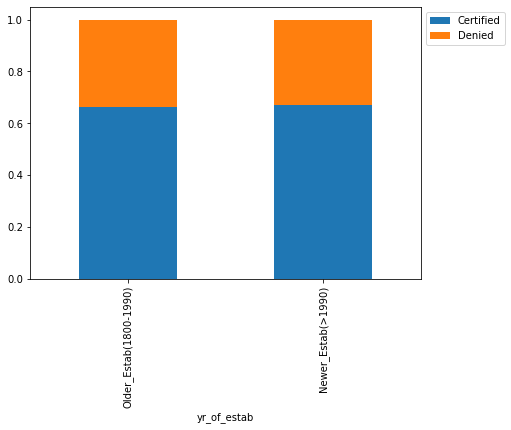

In [46]:
stacked_barplot(data, "yr_of_estab", "case_status")

- 65% of cases in both categories are approved
-  61% of employers were established after 1990 
- 39% of employers before 1990

case_status            Certified  Denied    All
requires_job_training                          
All                        17018    8462  25480
N                          15012    7513  22525
Y                           2006     949   2955
------------------------------------------------------------------------------------------------------------------------


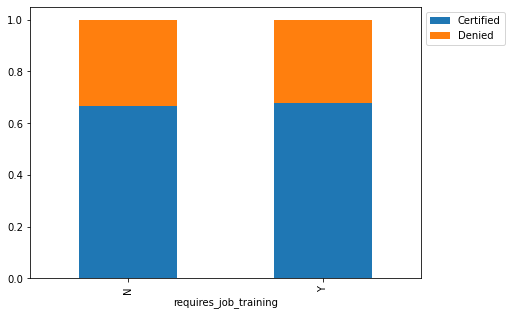

In [47]:
#requires_job_training and case status
stacked_barplot(data, "requires_job_training", "case_status")

- % visa certifications for requires_job_training is same 

case_status           Certified  Denied    All
region_of_employment                          
All                       17018    8462  25480
Northeast                  4526    2669   7195
West                       4100    2486   6586
South                      4913    2104   7017
Midwest                    3253    1054   4307
Island                      226     149    375
------------------------------------------------------------------------------------------------------------------------


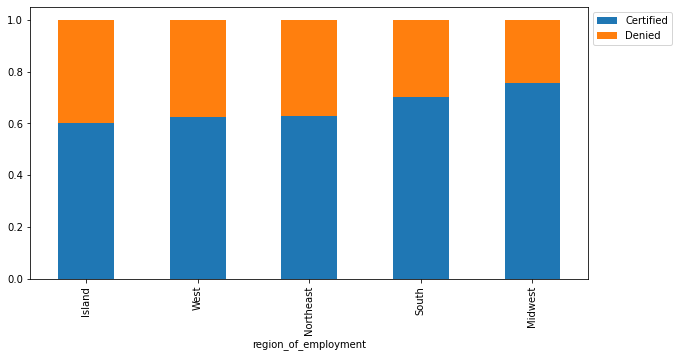

In [48]:
#region_of_employment and case status
stacked_barplot(data, "region_of_employment", "case_status")

- visa certifications for region_of_employment is higher in MidWest 

case_status         Certified  Denied    All
full_time_position                          
All                     17018    8462  25480
Y                       15163    7610  22773
N                        1855     852   2707
------------------------------------------------------------------------------------------------------------------------


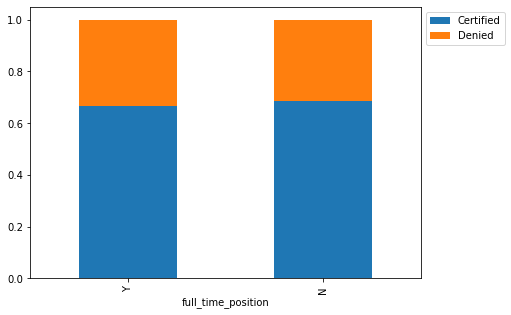

In [49]:
#full_time_position and case status
stacked_barplot(data, "full_time_position", "case_status")

- % visa certifications for full_time_position is same

## Questions

**1. Those with higher education may want to travel abroad for a well-paid job. Does education play a role in Visa certification?**




case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


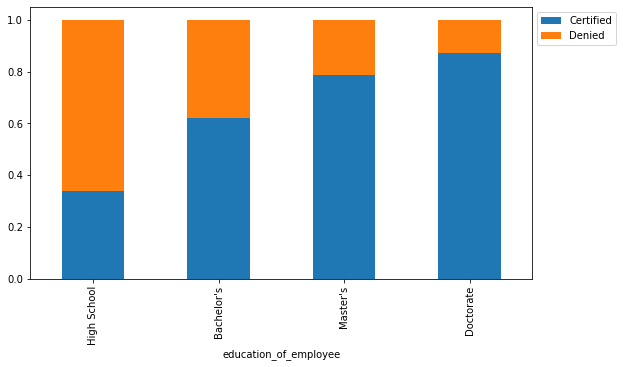

In [50]:
#education and case status
stacked_barplot(data, "education_of_employee", "case_status")

- Yes, Education play a role in Visa certification.The trend says for visa certification education of employees with Doctorate has higher chance than Master's than Bachelor's than High School.


 
**2. How does the visa status vary across different continents?**

case_status    Certified  Denied    All
continent                              
All                17018    8462  25480
Asia               11012    5849  16861
North America       2037    1255   3292
Europe              2957     775   3732
South America        493     359    852
Africa               397     154    551
Oceania              122      70    192
------------------------------------------------------------------------------------------------------------------------


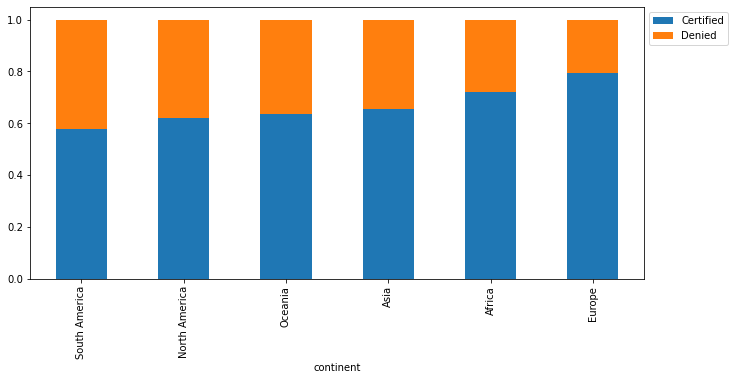

In [51]:
#continent and case status
stacked_barplot(data, "continent", "case_status")

- Trend observed shows that visa status vary across different continents is Europe > Africa > Asia > Oceania > North America & South America.



 
**3. Experienced professionals might look abroad for opportunities to improve their lifestyles and career development. Does work experience influence visa status?**

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


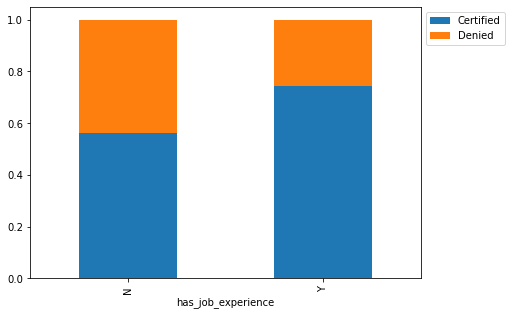

In [52]:
#job_experience and case status
stacked_barplot(data, "has_job_experience", "case_status")

- Work experience has influence visa status.

 
 
**4. In the United States, employees are paid at different intervals. Which pay unit is most likely to be certified for a visa?**



case_status   Certified  Denied    All
unit_of_wage                          
All               17018    8462  25480
Not_Hourly        16271    7052  23323
Hourly              747    1410   2157
------------------------------------------------------------------------------------------------------------------------


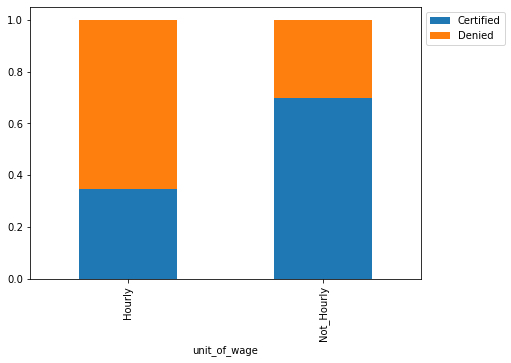

In [53]:
stacked_barplot(data, "unit_of_wage", "case_status")

- When unit of wages is hourly, only 35% of the cases were certified.
- 70% were certified when the unit_of_wage are not Hour-ly 
- This indicates that unit_of_wage is an important attribute that can influence case status.

 
 
**5. The US government has established a prevailing wage to protect local talent and foreign workers. How does the visa status change with the prevailing wage?**
 


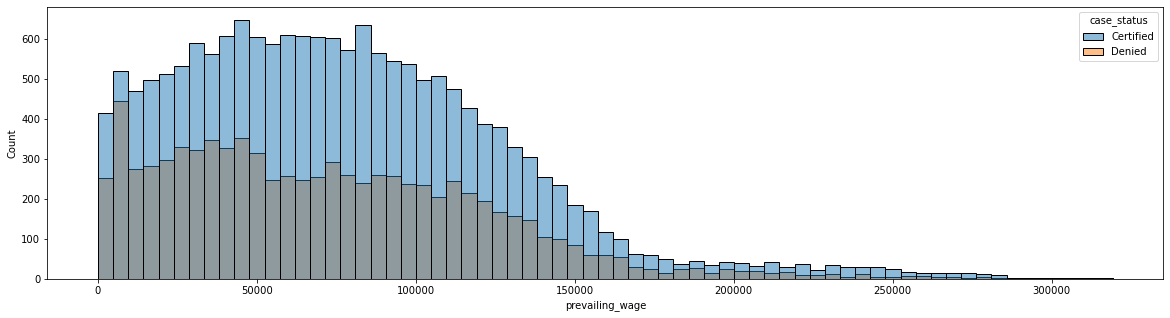

In [54]:
#prevailing_wage and case_status

plt.figure(figsize=(20,5))
sns.histplot(data, x="prevailing_wage", hue="case_status");

- There are outliers on the higher end, highly skilled positions. 


## EDA observations

#### 

- Number of employees in the employer's company is skewed right. 
- Year in which the employer's company was established is skewed left.
- 90% of all entries are with unit of prevailing wage as yearly
- 8.5% entries as hourly
- 66.2% of employees are from Asia
- Median and mean annual salary is approx. USD 70,000
- 40% of employees have either a bachelor's
- 38% has master's 
- 8% of applicants have a doctorate
- 13% HAS high school diploma
- 88% do not require job training
- 58% had prior job experience
- 88% are full time positions
- 67% cases that are verified are approved and 33% cases are denied
- 65% of cases in all categories are certified
- 58% are small sized companies
- 36% are medium_sized
- 6% are larege sized companies
- 50% of all cases are certified than denied for employers
- 65% of cases in both categories are approved
- 61% of employers were established after 1990
- 39% of employers before 1990
- 70% of cases are certified when the unit_of_wage is not hourly
- 35% cases are certified when the unit_of_wage is hourly
- More cases are certified than denied
- % certification for continents is Europe is higher.
- % visa certification for education of employees is Doctorate is highest.
- % visa certifications for has_job_experience is yes more than no
- visa certifications for region_of_employment is higher in MidWest
- % visa certifications for full_time_position is same

### Data Preparation for modeling

- We want to predict which visa will be certified.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

In [55]:
data["case_status"] = data["case_status"].apply(lambda x: 0 if x == "Denied" else 1)

## Split the dataset

In [56]:
#Separating features and the target column
X = data.drop("case_status", axis=1)
y = data["case_status"]
X = pd.get_dummies(X, drop_first=True)


In [57]:
#Splitting the data into train and test sets in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1, stratify=y)

In [58]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (17836, 20)
Shape of test set :  (7644, 20)
Percentage of classes in training set:
1    0.667919
0    0.332081
Name: case_status, dtype: float64
Percentage of classes in test set:
1    0.667844
0    0.332156
Name: case_status, dtype: float64



- We have 17,812 observations in the train set and 7,635  observations in the test set.

## Building Models

- We'll fit different models on the train data and observe their performance. 
- We'll try to improve that performance by tuning some hyperparameters available for that algorithm.
- We'll use GridSearchCv for hyperparameter tuning and `r_2 score` to optimize the model.
- R-square - `Coefficient of determination` is used to evaluate the performance of a regression model. It is the amount of the variation in the output dependent attribute which is predictable from the input independent variables.
- Let's start by creating a function to get model scores, so that we don't have to use the same codes repeatedly.

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models. 
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [59]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn


def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [60]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Decision Tree Model

In [61]:
#Fitting the model
d_tree = DecisionTreeClassifier(random_state=1)
d_tree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [62]:
#Calculating different metrics
d_tree_model_train_perf=model_performance_classification_sklearn(d_tree,X_train,y_train)
print("Training performance:\n",d_tree_model_train_perf)
d_tree_model_test_perf=model_performance_classification_sklearn(d_tree,X_test,y_test)
print("Testing performance:\n",d_tree_model_test_perf)

Training performance:
    Accuracy  Recall  Precision   F1
0       1.0     1.0        1.0  1.0
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.650314  0.729285   0.742521  0.735843


- The decision tree is overfitting the training data. 
- Training values are high but the testing metrics are not
- F1_score for the test set is only 0.73.
- We can improve model performance by hyperparameter tuning

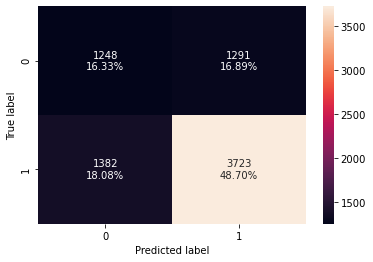

In [63]:
#Creating confusion matrix
confusion_matrix_sklearn(d_tree,X_test,y_test)

### Hyperparameter Tuning - Decision Tree

In [64]:
#Choose the type of classifier. 
dtree_estimator = DecisionTreeClassifier(class_weight={0:0.668,1:0.332},random_state=1)

# Grid of parameters to choose from
parameters = {'max_depth': np.arange(2,30), 
              'min_samples_leaf': [1, 2, 5, 7, 10],
              'max_leaf_nodes' : [2, 3, 5, 10,15],
              'min_impurity_decrease': [0.0001,0.001,0.01,0.1]
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(dtree_estimator, parameters, scoring=scorer,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
dtree_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
dtree_estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=2,
                       max_leaf_nodes=2, min_impurity_decrease=0.0001,
                       random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.712548  0.931923   0.720067  0.812411
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.706567  0.930852   0.715447  0.809058


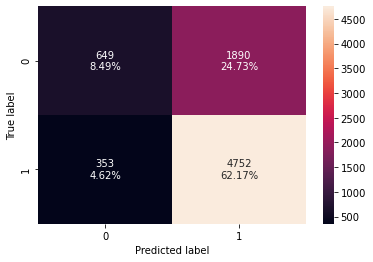

In [65]:
## Code to check performance for train data on tuned estimator
## Code to check performance for test data on tuned estimator

dtree_estimator_model_train_perf=model_performance_classification_sklearn(dtree_estimator,X_train,y_train)
print("Training performance:\n",dtree_estimator_model_train_perf)
dtree_estimator_model_test_perf=model_performance_classification_sklearn(dtree_estimator,X_test,y_test)
print("Testing performance:\n",dtree_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(dtree_estimator,X_test,y_test)

- The hyperparameter tuned decision tree is not overfiting the dataset
- F1 score has improved
- F1 score for both the train and test datasets are 0.812 & 0.809 respectively

# Building bagging and boosting models¶

### Bagging Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.979255  0.980106   0.988737  0.984403
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.681973  0.757297   0.764334  0.760799


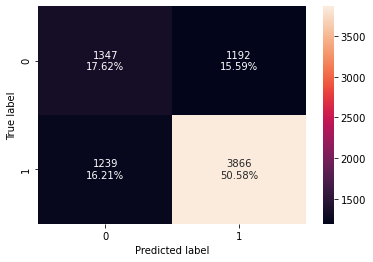

In [92]:
#Code to define bagging classifier with random state = 1
bagging_classifier = BaggingClassifier(random_state=1)
#Code to fit bagging classifier on the train data
bagging_classifier.fit(X_train,y_train)

#Calculating different metrics
bagging_classifier_model_train_perf=model_performance_classification_sklearn(bagging_classifier,X_train,y_train)
print("Training performance:\n", bagging_classifier_model_train_perf)
bagging_classifier_model_test_perf=model_performance_classification_sklearn(bagging_classifier,X_test,y_test)
print("Testing performance:\n", bagging_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_classifier,X_test,y_test)

- Bagging classifier is overfiting the training data

### Hyperparameter Tuning - Bagging Classifier

In [86]:
# Choose the type of classifier. 
bagging_estimator_tuned = BaggingClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {'max_samples': [0.7,0.8,0.9,1], 
              'max_features': [0.7,0.8,0.9,1],
              'n_estimators' : [10,20,30,40,50],
             }

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(bagging_estimator_tuned, parameters, scoring=scorer,cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
bagging_estimator_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
bagging_estimator_tuned.fit(X_train, y_train)

BaggingClassifier(max_features=0.7, max_samples=0.7, n_estimators=50,
                  random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.955427  0.993704   0.942666  0.967513
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.725929  0.879922   0.751925  0.810904


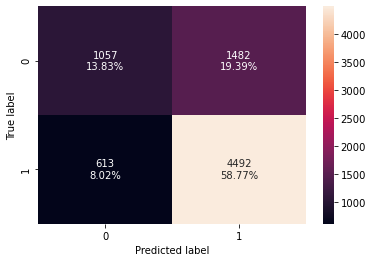

In [90]:
#Calculating different metrics
bagging_estimator_tuned_model_train_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_train,y_train)
print("Training performance:\n", bagging_estimator_tuned_model_train_perf)
bagging_estimator_tuned_model_test_perf=model_performance_classification_sklearn(bagging_estimator_tuned,X_test,y_test)
print("Testing performance:\n", bagging_estimator_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(bagging_estimator_tuned,X_test,y_test)

- Training metrics are high
- Testing metrics are not
- Model is still overfit.

### Random Forest

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999888  0.999916   0.999916  0.999916
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.677525  0.769442   0.753067  0.761167


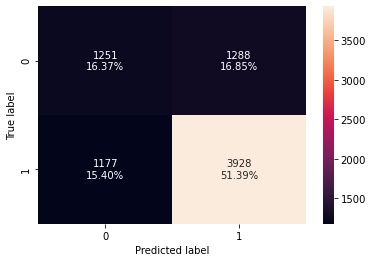

In [69]:
#Code to define random forest with random state = 1 
rf_estimator = RandomForestClassifier(random_state=1)
#Code to fit random forest on the train data
rf_estimator.fit(X_train,y_train)

#Calculating different metrics
rf_estimator_model_train_perf=model_performance_classification_sklearn(rf_estimator,X_train,y_train)
print("Training performance:\n",rf_estimator_model_train_perf)
rf_estimator_model_test_perf=model_performance_classification_sklearn(rf_estimator,X_test,y_test)
print("Testing performance:\n",rf_estimator_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_estimator,X_test,y_test)

- Overfitting the training data

# Tuning the hyperparameters improve the model performance

### Hyperparameter Tuning - Random Forest

In [70]:
# Choose the type of classifier. 
rf_tuned = RandomForestClassifier(class_weight={0:0.668,1:0.332},random_state=1,oob_score=True,bootstrap=True)

parameters = {  
                'max_depth': list(np.arange(10,30,10)) + [None],
                'max_features': ['sqrt',None],
                'min_samples_leaf': np.arange(5,15,5),
                'min_samples_split': np.arange(5, 20, 5),
                'n_estimators': np.arange(20,120,40)}


# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(rf_tuned, parameters, scoring=scorer, cv=3,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
rf_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.668, 1: 0.332}, max_depth=10,
                       max_features='sqrt', min_samples_leaf=5,
                       min_samples_split=5, oob_score=True, random_state=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.748206  0.780072   0.832408  0.805391
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.719257  0.759647   0.808422  0.783276


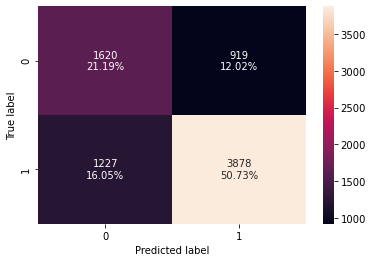

In [71]:
#Code to check performance for train data on tuned estimator
rf_tuned_model_train_perf=model_performance_classification_sklearn(rf_tuned,X_train,y_train)
print("Training performance:\n",rf_tuned_model_train_perf)
#Code to check performance for test data on tuned estimator
rf_tuned_model_test_perf=model_performance_classification_sklearn(rf_tuned,X_test,y_test)
print("Testing performance:\n",rf_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(rf_tuned,X_test,y_test)


- Tuning the hyperparameters has decreased the overfit and increased F1 score
- But model is not performing as optimally as the hyperparameter tuned decision tree

### AdaBoost Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.738619  0.886007   0.761599  0.819106
Testing performance:
    Accuracy    Recall  Precision        F1
0   0.73561  0.885994   0.758638  0.817385


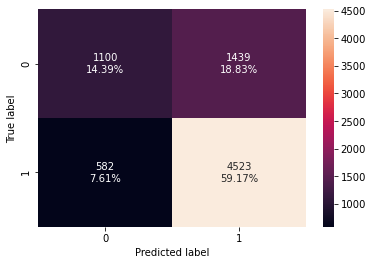

In [72]:
#Code to define AdaBoost Classifier with random state = 1
ab_classifier = AdaBoostClassifier(random_state=1)
#Code to fit AdaBoost Classifier on the train data
ab_classifier.fit(X_train,y_train)

#Code to check performance on train data
ab_classifier_model_train_perf=model_performance_classification_sklearn(ab_classifier,X_train,y_train)
print("Training performance:\n", ab_classifier_model_train_perf)
#Code to check performance on test data
ab_classifier_model_test_perf=model_performance_classification_sklearn(ab_classifier,X_test,y_test)
print("Testing performance:\n", ab_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(ab_classifier,X_test,y_test)

### Hyperparameter Tuning - AdaBoost Classifier

In [73]:
# Choose the type of classifier. 
abc_tuned = AdaBoostClassifier(random_state=1)

# Grid of parameters to choose from
parameters = {
    #Let's try different max_depth for base_estimator
    "base_estimator":[DecisionTreeClassifier(max_depth=1),
                      DecisionTreeClassifier(max_depth=2)],
    "n_estimators": np.arange(20,120,40),
    "learning_rate":np.arange(0.2,2,0.6)
}

# Type of scoring used to compare parameter  combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(abc_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
abc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
abc_tuned.fit(X_train, y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                   learning_rate=0.2, n_estimators=60, random_state=1)

Training performance:
    Accuracy   Recall  Precision        F1
0  0.749832  0.87266   0.779252  0.823315
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.744244  0.87189   0.773818  0.819932


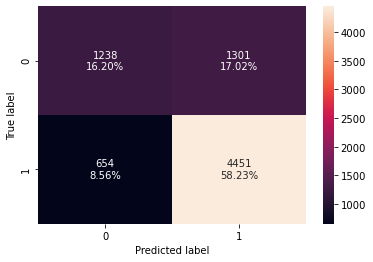

In [74]:
#Checking model performance on training set
abc_tuned_model_train_perf=model_performance_classification_sklearn(abc_tuned,X_train,y_train)
print("Training performance:\n", abc_tuned_model_train_perf)
#Checking model performance on test set
abc_tuned_model_test_perf=model_performance_classification_sklearn(abc_tuned,X_test,y_test)
print("Testing performance:\n", abc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(abc_tuned,X_test,y_test)

- AdaBoost classifier is not overfitting the training data.
- F1 score 0.823 & 0.819 on the training & testing data

### Gradient Boosting Classifier

Training performance:
    Accuracy    Recall  Precision        F1
0  0.755551  0.878284   0.782397  0.827573
Testing performance:
    Accuracy  Recall  Precision        F1
0  0.747122  0.8762    0.77468  0.822318


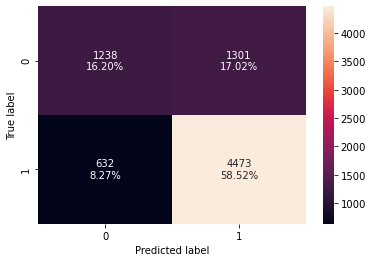

In [75]:
#Fitting the model
gb_classifier = GradientBoostingClassifier(random_state=1)
gb_classifier.fit(X_train,y_train)

#Code to create confusion matrix for train data
gb_classifier_model_train_perf=model_performance_classification_sklearn(gb_classifier,X_train,y_train)
print("Training performance:\n",gb_classifier_model_train_perf)
#Code to create confusion matrix for test data
gb_classifier_model_test_perf=model_performance_classification_sklearn(gb_classifier,X_test,y_test)
print("Testing performance:\n",gb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gb_classifier,X_test,y_test)

- Very high F1 scores of 0.827 and 0.822 respectively

### Hyperparameter Tuning - Gradient Boosting Classifier

In [76]:
# Choose the type of classifier. 
gbc_tuned = GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),random_state=1)

# Grid of parameters to choose from
parameters = {
    "n_estimators": [100,175,250],
    "subsample":[0.8,1],
    "max_features":[0.8,0.9,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(gbc_tuned, parameters, scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
gbc_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
gbc_tuned.fit(X_train, y_train)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           max_features=0.9, n_estimators=175, random_state=1,
                           subsample=1)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.760316  0.879795   0.786626  0.830606
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.746337  0.872674   0.775592  0.821274


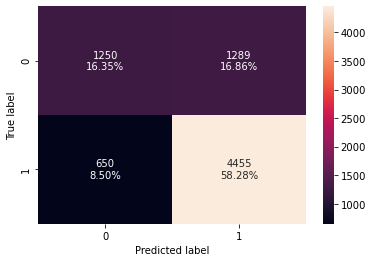

In [77]:
#Code to check performance for train data on tuned estimator
gbc_tuned_model_train_perf=model_performance_classification_sklearn(gbc_tuned,X_train,y_train)
print("Training performance:\n",gbc_tuned_model_train_perf)
#Code to check performance for test data on tuned estimator
gbc_tuned_model_test_perf=model_performance_classification_sklearn(gbc_tuned,X_test,y_test)
print("Testing performance:\n",gbc_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(gbc_tuned,X_test,y_test)

- There is not much difference in the model performance after hyperparameter tuning

### XGBoost Classifier

Training performance:
    Accuracy  Recall  Precision        F1
0  0.810944  0.9127     0.8234  0.865754
Testing performance:
    Accuracy    Recall  Precision       F1
0  0.736656  0.863467   0.770091  0.81411


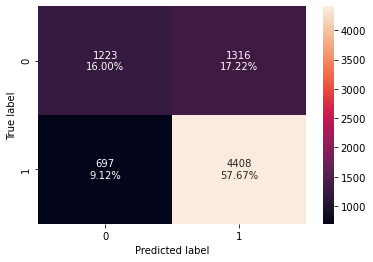

In [78]:
#Fitting the model
xgb_classifier = XGBClassifier(random_state=1, eval_metric='logloss')
xgb_classifier.fit(X_train,y_train)

#Code to check performance for train data
xgb_classifier_model_train_perf=model_performance_classification_sklearn(xgb_classifier,X_train,y_train)
print("Training performance:\n",xgb_classifier_model_train_perf)
#Code to check performance for test data
xgb_classifier_model_test_perf=model_performance_classification_sklearn(xgb_classifier,X_test,y_test)
print("Testing performance:\n",xgb_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_classifier,X_test,y_test)

- XGBoosing is slightly overfitting

### Hyperparameter Tuning - XGBoost Classifier

In [93]:
# Choose the type of classifier. 
xgb_tuned = XGBClassifier(random_state=1, eval_metric='logloss')

# Grid of parameters to choose from
parameters = {
    "n_estimators": [10,30,50],
    "scale_pos_weight":[1,2,5],
    "subsample":[0.7,0.9,1],
    "learning_rate":[0.05, 0.1,0.2],
    "colsample_bytree":[0.7,0.9,1],
    "colsample_bylevel":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.f1_score)

# Run the grid search
grid_obj = GridSearchCV(xgb_tuned, parameters,scoring=scorer,cv=3)
grid_obj = grid_obj.fit(X_train, y_train)

# Set the clf to the best combination of parameters
xgb_tuned = grid_obj.best_estimator_

# Fit the best algorithm to the data.
xgb_tuned.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=0.5,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=10, n_jobs=0,
              num_parallel_tree=1, random_state=1, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.7, tree_method='exact',
              validate_parameters=1, verbosity=None)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.757401  0.874003   0.786524  0.827959
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.746599  0.871107   0.776633  0.821161


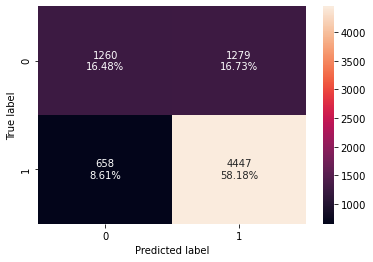

In [94]:
#Code to check performance for train data on tuned estimator
xgb_tuned_model_train_perf=model_performance_classification_sklearn(xgb_tuned,X_train,y_train)
print("Training performance:\n",xgb_tuned_model_train_perf)
#Code to check performance for train data on tuned estimator
xgb_tuned_model_test_perf=model_performance_classification_sklearn(xgb_tuned,X_test,y_test)
print("Testing performance:\n",xgb_tuned_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(xgb_tuned,X_test,y_test)

- Overfitting has reduced
- F1 scores are 0.827 and 0.821 for the training & testing datasets

### Stacking Classifier

In [81]:
estimators = [('Ad Boost Tuned',abc_tuned), ('Gradient Boost Tuned',gbc_tuned), ('Decision Tree Tuned',dtree_estimator)]

final_estimator = xgb_tuned

stacking_classifier= StackingClassifier(estimators=estimators,final_estimator=final_estimator)

stacking_classifier.fit(X_train,y_train)

StackingClassifier(estimators=[('Ad Boost Tuned',
                                AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=2),
                                                   learning_rate=0.2,
                                                   n_estimators=60,
                                                   random_state=1)),
                               ('Gradient Boost Tuned',
                                GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                                                           max_features=0.9,
                                                           n_estimators=175,
                                                           random_state=1,
                                                           subsample=1)),
                               ('Decision Tree Tuned',
                                DecisionT...
                                                 eval_metric='logloss', gamma=0,


Training performance:
    Accuracy    Recall  Precision        F1
0  0.756167  0.870142   0.787211  0.826602
Testing performance:
    Accuracy   Recall  Precision        F1
0  0.744898  0.86523   0.777778  0.819177


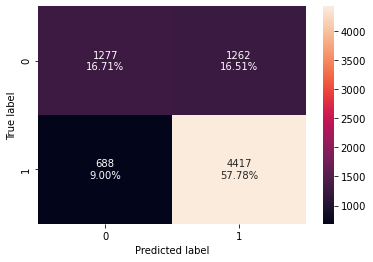

In [82]:
#Code to check performance on train data
stacking_classifier_model_train_perf=model_performance_classification_sklearn(stacking_classifier,X_train,y_train)
print("Training performance:\n",stacking_classifier_model_train_perf)
#Code to check performance on test data
stacking_classifier_model_test_perf=model_performance_classification_sklearn(stacking_classifier,X_test,y_test)
print("Testing performance:\n",stacking_classifier_model_test_perf)

#Creating confusion matrix
confusion_matrix_sklearn(stacking_classifier,X_test,y_test)

- Training & testing F1 scores of 0.826 & 0.819

# Model Performance Comparison and Conclusions

### Conclusion

**Comparing all models**

In [83]:
# training performance comparison

models_train_comp_df = pd.concat(
    [d_tree_model_train_perf.T,dtree_estimator_model_train_perf.T,rf_estimator_model_train_perf.T,rf_tuned_model_train_perf.T,
     bagging_classifier_model_train_perf.T,bagging_estimator_tuned_model_train_perf.T,ab_classifier_model_train_perf.T,
     abc_tuned_model_train_perf.T,gb_classifier_model_train_perf.T,gbc_tuned_model_train_perf.T,xgb_classifier_model_train_perf.T,
    xgb_tuned_model_train_perf.T,stacking_classifier_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,1.0,0.712548,0.999888,0.748206,0.979255,0.955427,0.738619,0.749832,0.755551,0.760316,0.810944,0.757401,0.756167
Recall,1.0,0.931923,0.999916,0.780072,0.980106,0.993704,0.886007,0.872660,0.878284,0.879795,0.912700,0.874003,0.870142
Precision,1.0,0.720067,0.999916,0.832408,0.988737,0.942666,0.761599,0.779252,0.782397,0.786626,0.823400,0.786524,0.787211
F1,1.0,0.812411,0.999916,0.805391,0.984403,0.967513,0.819106,0.823315,0.827573,0.830606,0.865754,0.827959,0.826602


- Decision tree, Random forest model, Bagging classifier,XGBoost,AdaBoost classifier is overfiting the training data.
-  AdaBoost classifier training & testing data with a F1 score 0.819 & 0.816
- Gradient boosting model F1 scores of 0.827 and 0.821 respectively
- Gradient Boosting - Hyperparameter Tuning is .826  ans .8201
- XGBoost tuned has the highest F1 score  0.827 and 0.821

In [84]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [d_tree_model_test_perf.T,dtree_estimator_model_test_perf.T,rf_estimator_model_test_perf.T,rf_tuned_model_test_perf.T,
     bagging_classifier_model_test_perf.T,bagging_estimator_tuned_model_test_perf.T,ab_classifier_model_test_perf.T,
     abc_tuned_model_test_perf.T,gb_classifier_model_test_perf.T,gbc_tuned_model_test_perf.T,xgb_classifier_model_test_perf.T,
    xgb_tuned_model_test_perf.T,stacking_classifier_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Decision Tree",
    "Decision Tree Tuned",
    "Random Forest",
    "Random Forest Tuned",
    "Bagging Classifier",
    "Bagging Estimator Tuned",
    "Adaboost Classifier",
    "Adabosst Classifier Tuned",
    "Gradient Boost Classifier",
    "Gradient Boost Classifier Tuned",
    "XGBoost Classifier",
    "XGBoost Classifier Tuned",
    "Stacking Classifier"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Bagging Classifier,Bagging Estimator Tuned,Adaboost Classifier,Adabosst Classifier Tuned,Gradient Boost Classifier,Gradient Boost Classifier Tuned,XGBoost Classifier,XGBoost Classifier Tuned,Stacking Classifier
Accuracy,0.650314,0.706567,0.677525,0.719257,0.681973,0.725929,0.735610,0.744244,0.747122,0.746337,0.736656,0.746599,0.744898
Recall,0.729285,0.930852,0.769442,0.759647,0.757297,0.879922,0.885994,0.871890,0.876200,0.872674,0.863467,0.871107,0.865230
Precision,0.742521,0.715447,0.753067,0.808422,0.764334,0.751925,0.758638,0.773818,0.774680,0.775592,0.770091,0.776633,0.777778
F1,0.735843,0.809058,0.761167,0.783276,0.760799,0.810904,0.817385,0.819932,0.822318,0.821274,0.814110,0.821161,0.819177


### Important features of the final model

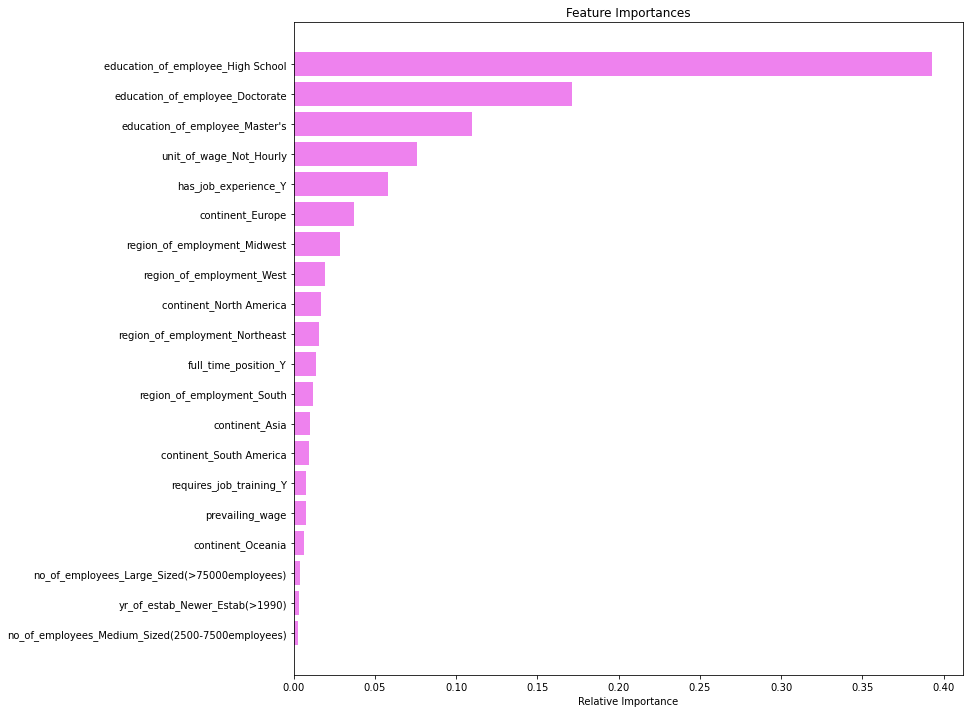

In [85]:
feature_names = X_train.columns
importances = xgb_tuned.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='violet', align='center')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

- Education of the employee is an important attribute on visa certification.
- Job experience of employee,  unit_of_wage, continent of the employee Region of employment are also important attributes.

# Business Recommendations

## Observation:

- An employee with doctorate has more chance of getting visa than employee with high school certififcation .

- Employee with a non-hourly pay (week-ly, month-ly or year-ly) has more chance of gettting visa employee with hourly pay.
- Continent of employee has role in visa certification.

- Employee with prior job experience has more chance of getting visa approved than employee with no prior work experience.

- Region of the US the employment opportunity is an impt factor for getting certified.
- Fulltime/part time,employee needs training, annual prevailing wage, do not have much bearing on a case getting certified vs denied.

- XGBoost hyperparameter tuned has the highest F1 score  0.827 on training and 0.821 testing. Overfitting is reduced hee.It is able to give generalized prediction.
- Precision and Recall is 78% and 87% respectively.


## Recommendations:

- From confusion matrix, we understand that large percentage is getting accepted, only a small percentage get rejected. So revaluation of cases that are rejected can be done to reduce the employee shortage.

